# This is the Juypter Notebook containing simulations for Theorem 6 in the paper "Networked Competitive Bivirus SIS Model - Analysis of the Discrete-Time Case"

In [46]:
import bivirus
import numpy as np
import importlib
importlib.reload(bivirus)

<module 'bivirus' from 'd:\\Documents\\Rice\\Research\\Discrete-time-competitive-bivirus-SIS\\bivirus.py'>

In [47]:
def path_graph_adjacency(n, W = 1):
    A = np.zeros((n, n))
    for i in range(n - 1):
        A[i, i + 1] = np.random.uniform(0, W)
        A[i + 1, i] = np.random.uniform(0, W)
    return A

In [48]:
# configurations of the experiment
config = bivirus.SimulationConfig(N=20, h=0.001, threshold=1.5, W=2, iterations=10000, tolerance=1e-6)

# random seed for reproducibility
seed = 1049
np.random.seed(seed)

# parameters of the model
A1_raw, A2_raw = np.random.uniform(0, config.W, (config.N, config.N)), np.random.uniform(0, config.W, (config.N, config.N))
# Set all values in A below 'threshold' to zero
A1_thres = np.where(A1_raw < config.threshold, 0, A1_raw)
A2_thres = np.where(A2_raw < config.threshold, 0, A2_raw)

# add the path graph adjacency matrix to ensure strong connectivity
A1 = A1_thres + path_graph_adjacency(config.N, W=config.W/10)
A2 = A2_thres + path_graph_adjacency(config.N, W=config.W/10)

beta = [
    50 * np.ones(config.N),
    0.6 * np.ones(config.N)
]
B1 = np.diag(beta[0]) @ A1
B2 = np.diag(beta[1]) @ A2
B = [B1, B2]
delta = [
    0.2 * np.ones(config.N),
    4 * np.ones(config.N)
]
print("B1 is:", B1)
print()
print("B2 is:", B2)

B1 is: [[ 75.02548032  94.3028032    0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.          78.10574539  83.78132141   0.        ]
 [  9.9958415   89.63494878   8.5557801    0.          94.91975131
   87.68623808   0.           0.          80.8214927   99.47398229
    0.           0.           0.           0.           0.
   95.6453584    0.          91.45753294   0.           0.        ]
 [  0.           7.62765076   0.          90.69589535   0.
    0.           0.          92.66206731   0.           0.
    0.           0.           0.          81.52344629  76.28768596
   76.38565635   0.           0.          75.49135374   0.        ]
 [  0.          86.69486675  97.59394443   0.           5.31004515
   84.87344583   0.           0.          94.76285597   0.
    0.           0.          82.360378     0.          99.66492264
    0.           0.           0.         

In [49]:
# check assumptions of the theorems 2 and 3
print("Assumptions of theorems:")
print("Theorem 2 satisfied:", bivirus.check_theorem_2(B, delta, config))
print("Theorem 3:", bivirus.check_theorem_3(B, delta, config))

Assumptions of theorems:
spectral radius 1 is 1.4295719892567678
spectral radius 2 is 1.001519489550264
Theorem 2 satisfied: False
Theorem 3: 0


In [50]:
# calculate the boundary equilibria corresponding to virus 1 and virus 2
x1_bar = bivirus.x_bar(0.1 * np.ones(config.N), B[0], delta[0], config)
x2_bar = bivirus.x_bar(0.1 * np.ones(config.N), B[1], delta[1], config)
print("x1_bar: ", x1_bar)
print("x2_bar: ", x2_bar)

# Confirm whether the boundary equilibria for one virus is component-wise greater than the other
print("\nx1_bar << x2_bar:", np.all(x1_bar < x2_bar)) 
print("x1_bar >> x2_bar:", np.all(x1_bar > x2_bar))

x_bar Converged at iteration 64
x_bar Converged at iteration 5287
x1_bar:  [0.99939624 0.99969611 0.99960049 0.99968109 0.99962177 0.99943971
 0.99942897 0.99957638 0.99945119 0.99971518 0.9992409  0.99895939
 0.99919554 0.99921206 0.99953529 0.99956879 0.99943346 0.99967011
 0.99930818 0.99942482]
x2_bar:  [0.24925771 0.1976967  0.31605592 0.23747994 0.34361544 0.28256378
 0.32793821 0.25000682 0.25075907 0.28397901 0.36099993 0.09242622
 0.35020025 0.23645307 0.17153856 0.26981512 0.16190104 0.25892663
 0.21758488 0.30347109]

x1_bar << x2_bar: False
x1_bar >> x2_bar: True


## Part i. the equilibrium point (0, 0) is unstable

To validate part i) of Theorem 6, we add a small pertubation to (0, 0) and use that as the initial conditions, and run simulations of the system till convergance. 

x1 is [0.09715804 0.09715804 0.09715804 0.09715804 0.09715804 0.09715804
 0.09715804 0.09715804 0.09715804 0.09715804 0.09715804 0.09715804
 0.09715804 0.09715804 0.09715804 0.09715804 0.09715804 0.09715804
 0.09715804 0.09715804]
x2 is [0.08262027 0.08262027 0.08262027 0.08262027 0.08262027 0.08262027
 0.08262027 0.08262027 0.08262027 0.08262027 0.08262027 0.08262027
 0.08262027 0.08262027 0.08262027 0.08262027 0.08262027 0.08262027
 0.08262027 0.08262027]
All assumptions satisfied
Main loop Converged at iteration 1835
x1 is [0.03887839 0.03887839 0.03887839 0.03887839 0.03887839 0.03887839
 0.03887839 0.03887839 0.03887839 0.03887839 0.03887839 0.03887839
 0.03887839 0.03887839 0.03887839 0.03887839 0.03887839 0.03887839
 0.03887839 0.03887839]
x2 is [0.01962764 0.01962764 0.01962764 0.01962764 0.01962764 0.01962764
 0.01962764 0.01962764 0.01962764 0.01962764 0.01962764 0.01962764
 0.01962764 0.01962764 0.01962764 0.01962764 0.01962764 0.01962764
 0.01962764 0.01962764]
All assumpti

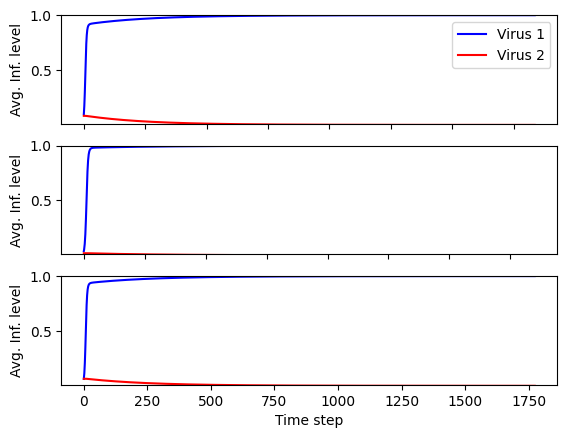

In [51]:
x1_histories = []
x2_histories = []
x1_avg_histories = []
x2_avg_histories = []

x1 = np.zeros(config.N)
x2 = np.zeros(config.N)
for i in range(3):
    pertubation = np.random.uniform(0, 0.1)
    x1.fill(pertubation)
    print("x1 is "+str(x1))
    pertubation = np.random.uniform(0, 0.1)
    x2.fill(pertubation)
    print("x2 is " + str(x2))
    bivirus.check_basic_assumptions(x1, x2, B, delta, config)
    results = bivirus.run_simulation(x1, x2, B, delta, config)

    # record results
    x1_histories.append(results["x1_history"])
    x2_histories.append(results["x2_history"])
    x1_avg_histories.append(results["x1_avg_history"])
    x2_avg_histories.append(results["x2_avg_history"])

bivirus.plot_simulation_1by3(x1_avg_histories, x2_avg_histories, yscale='linear')


## Part ii. The equilibrium ($0, \bar{x}_2$) is unstable

To validate part ii) of the theorem, we will add a small pertubation to ($0, \bar{x}_2$) and use that as the initial conditions for the simulation.

x1 is [0.01758202 0.01758202 0.01758202 0.01758202 0.01758202 0.01758202
 0.01758202 0.01758202 0.01758202 0.01758202 0.01758202 0.01758202
 0.01758202 0.01758202 0.01758202 0.01758202 0.01758202 0.01758202
 0.01758202 0.01758202]
x2 is [0.26683973 0.21527872 0.33363794 0.25506196 0.36119746 0.3001458
 0.34552023 0.26758883 0.26834109 0.30156102 0.37858195 0.11000824
 0.36778227 0.25403509 0.18912058 0.28739714 0.17948305 0.27650865
 0.2351669  0.32105311]
All assumptions satisfied
Main loop Converged at iteration 2148
x1 is [0.089081 0.089081 0.089081 0.089081 0.089081 0.089081 0.089081 0.089081
 0.089081 0.089081 0.089081 0.089081 0.089081 0.089081 0.089081 0.089081
 0.089081 0.089081 0.089081 0.089081]
x2 is [0.33833871 0.2867777  0.40513692 0.32656094 0.43269644 0.37164478
 0.41701921 0.33908781 0.33984007 0.37306001 0.45008093 0.18150722
 0.43928125 0.32553407 0.26061956 0.35889612 0.25098204 0.34800763
 0.30666588 0.39255209]
All assumptions satisfied
Main loop Converged at itera

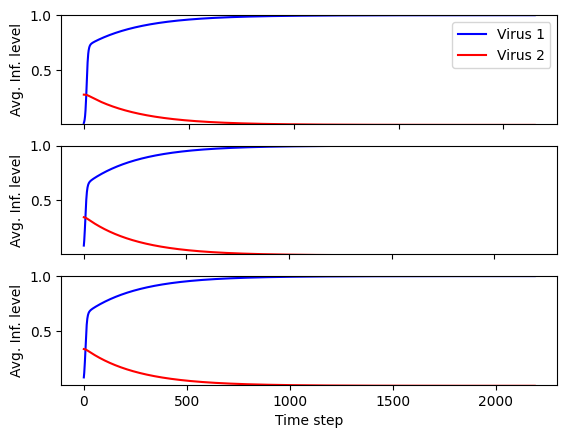

In [52]:
x1_histories = []
x2_histories = []
x1_avg_histories = []
x2_avg_histories = []

x1 = np.zeros(config.N)
x2 = np.zeros(config.N)
for i in range(3):
    pertubation = np.random.uniform(0, 0.1)
    x1.fill(pertubation)
    print("x1 is " + str(x1))
    x2 = x2_bar + pertubation * np.ones(config.N)
    print("x2 is " + str(x2))
    bivirus.check_basic_assumptions(x1, x2, B, delta, config)
    results = bivirus.run_simulation(x1, x2, B, delta, config)

    # record results
    x1_histories.append(results["x1_history"])
    x2_histories.append(results["x2_history"])
    x1_avg_histories.append(results["x1_avg_history"])
    x2_avg_histories.append(results["x2_avg_history"])

bivirus.plot_simulation_1by3(x1_avg_histories, x2_avg_histories, yscale='linear')


## Part iii. the Equilibrium point ($\bar{x}_1, 0$) is locally exponentially stable

To validate part iii) of the theorem, we will add a small pertubation to ($\bar{x}_1, 0$) and use that as the initial conditions for the simulation. We expect to see the system converge back to ($\bar{x}_1, 0$) exponentially.

x1 is [0.92129761 0.92159747 0.92150186 0.92158246 0.92152314 0.92134108
 0.92133034 0.92147775 0.92135256 0.92161655 0.92114227 0.92086076
 0.92109691 0.92111343 0.92143666 0.92147016 0.92133483 0.92157148
 0.92120955 0.92132618]
x2 is [0.07809863 0.07809863 0.07809863 0.07809863 0.07809863 0.07809863
 0.07809863 0.07809863 0.07809863 0.07809863 0.07809863 0.07809863
 0.07809863 0.07809863 0.07809863 0.07809863 0.07809863 0.07809863
 0.07809863 0.07809863]
All assumptions satisfied
Main loop Converged at iteration 1812
x1 is [0.99219928 0.99249914 0.99240353 0.99248413 0.99242481 0.99224274
 0.99223201 0.99237942 0.99225422 0.99251821 0.99204394 0.99176243
 0.99199858 0.9920151  0.99233833 0.99237183 0.99223649 0.99247315
 0.99211122 0.99222785]
x2 is [0.00719696 0.00719696 0.00719696 0.00719696 0.00719696 0.00719696
 0.00719696 0.00719696 0.00719696 0.00719696 0.00719696 0.00719696
 0.00719696 0.00719696 0.00719696 0.00719696 0.00719696 0.00719696
 0.00719696 0.00719696]
All assumpti

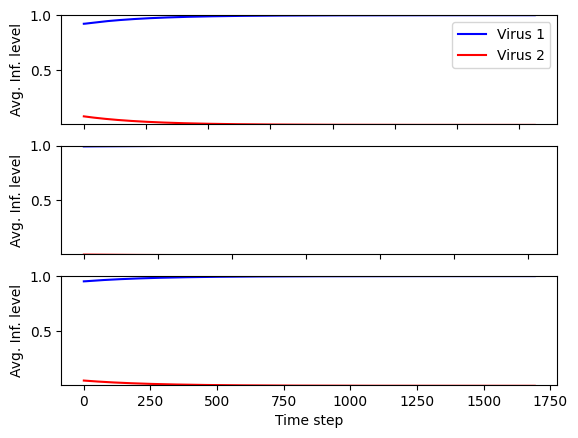

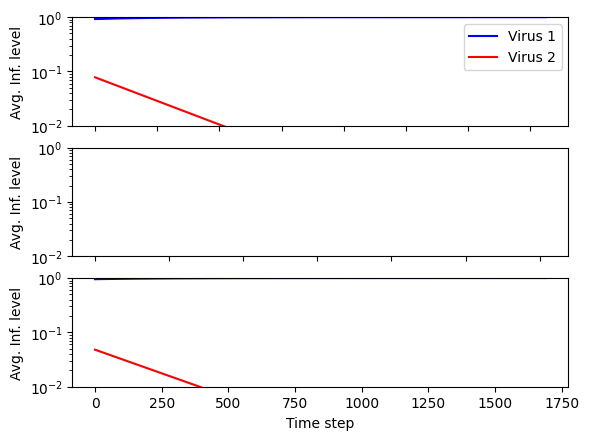

In [55]:
x1_histories = []
x2_histories = []
x1_avg_histories = []
x2_avg_histories = []

x1 = np.zeros(config.N)
x2 = np.zeros(config.N)
for i in range(3):
    pertubation = np.random.uniform(0, 0.1)
    x1 = x1_bar - pertubation * np.ones(config.N)
    print("x1 is " + str(x1))
    x2.fill(pertubation)
    print("x2 is " + str(x2))
    bivirus.check_basic_assumptions(x1, x2, B, delta, config)
    results = bivirus.run_simulation(x1, x2, B, delta, config)

    # record results
    x1_histories.append(results["x1_history"])
    x2_histories.append(results["x2_history"])
    x1_avg_histories.append(results["x1_avg_history"])
    x2_avg_histories.append(results["x2_avg_history"])

bivirus.plot_simulation_1by3(x1_avg_histories, x2_avg_histories, yscale='linear')
bivirus.plot_simulation_1by3(x1_avg_histories, x2_avg_histories, yscale='log')